In [ ]:
!pip install pca
!pip install pyshark
!pip install asyncio

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/Users/vikramvelankar/Downloads/20-ades/dev.csv')

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,NaN,udp,private,SF,105,147,0,0,0,0,...,56,0.60,0.03,0.01,0.00,0.00,0.0,0.00,0.00,0.0
1,NaN,udp,private,SF,105,147,0,0,0,0,...,250,0.98,0.01,0.01,0.00,0.00,0.0,0.00,0.00,0.0
2,NaN,tcp,http,REJ,0,0,0,0,0,0,...,255,1.00,0.00,0.08,0.24,0.00,0.0,1.00,0.99,0.0
3,NaN,tcp,http,SF,310,2268,0,0,0,0,...,255,1.00,0.00,0.05,0.04,0.00,0.0,0.00,0.00,0.0
4,NaN,udp,domain_u,SF,46,46,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642533,0.0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,NaN
642534,8.0,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,NaN
642535,0.0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,NaN
642536,0.0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,NaN


In [ ]:
features = ['src_bytes','dst_bytes','dst_host_same_src_port_rate','rerror_rate','srv_rerror_rate','dst_host_srv_diff_host_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']

x = df.loc[:,features].values

y = df.loc[:,['flag']].values

x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)

pca_trans = pca.fit_transform(x)

pdf = pd.DataFrame(data = pca_trans, columns = ['PCA1','PCA2'])

pdf

,PCA1,PCA2
0,-0.603173,0.541064
1,-0.603173,0.541064
2,8.848580,-2.834459
3,-0.586483,-0.034454
4,-0.600809,0.548702
...,...,...
642533,-0.600809,0.548700
642534,-0.603173,0.541065
642535,-0.569382,0.548565
642536,-0.600809,0.548700


In [ ]:
fpdf = pd.concat([pdf , df[['flag']]], axis =1)

fpdf

,PCA1,PCA2,flag
0,-0.603173,0.541064,SF
1,-0.603173,0.541064,SF
2,8.848580,-2.834459,REJ
3,-0.586483,-0.034454,SF
4,-0.600809,0.548702,SF
...,...,...,...
642533,-0.600809,0.548700,S0
642534,-0.603173,0.541065,SF
642535,-0.569382,0.548565,SF
642536,-0.600809,0.548700,S0


array([59.32749483, 10.03051914])

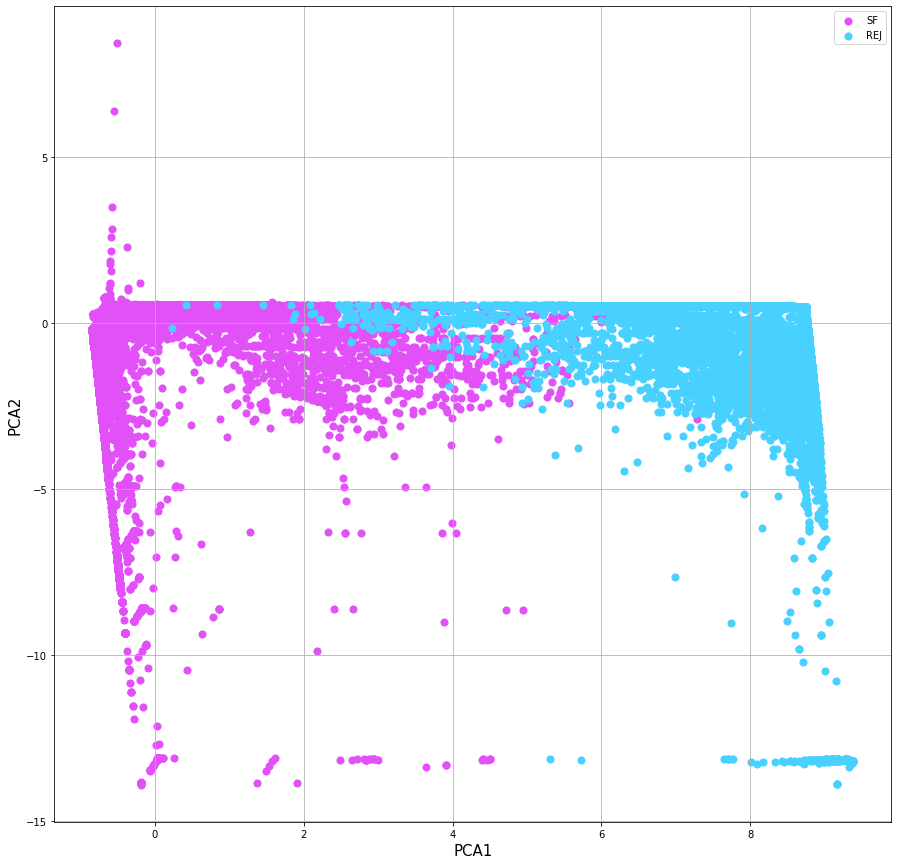

In [ ]:
ploter = plt.figure(figsize= (15,15))

axs = ploter.add_subplot(1,1,1)

axs.set_xlabel('PCA1',fontsize = 15)
axs.set_ylabel('PCA2', fontsize = 15)

flags = ['SF','REJ']

colors = ['#E250F7','#48D0FF']

for flag,color in zip(flags,colors):
  indices = fpdf['flag']==flag
  axs.scatter(fpdf.loc[indices,'PCA1'], fpdf.loc[indices,'PCA2'], c=color,s=50)

axs.legend(flags)
axs.grid()

pevr = pca.explained_variance_ratio_*100

pevr

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xfin = fpdf[['PCA1','PCA2']]
yfin = fpdf['flag']

x_train,x_test,y_train,y_test = train_test_split(xfin,yfin,test_size=0.1)

logistic = LogisticRegression(solver = 'lbfgs', max_iter= 700000)
logistic.fit(x_train,y_train)

results = logistic.predict(x_test)

score2 = logistic.score(x_test,y_test)

In [ ]:
print(f'ACCURACY = {score2*100}%')


from sklearn.metrics import confusion_matrix

results = confusion_matrix(['PCA1','PCA2'], flags)

print(f'CONFUSION MATRIX =\n {results}')

ACCURACY = 86.85529305568525%
CONFUSION MATRIX =
 [[0 0 0 1]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]]
